In [19]:
%config IPCompleter.greedy=True
import trade_model as td
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression

In [2]:
dm = td.DataModel("../xcels", ["master0.csv", "master1.csv"])
dm.read()

In [3]:
symbol = "فولاد"
# df = dm.get(symbol, "1394-4-23", "1394-6-18")
df = dm.get(symbol)
df["millis"] = df.index.values.astype(np.int64)
df["maptime"] = range(1,len(df)+1)

In [22]:
def linear_regression(df_symbol):
    model = LinearRegression()
    x = df_symbol["maptime"].values.reshape(-1,1)
    y = df_symbol["log_adj_end"].values
    model.fit(x, y)
    return model.coef_

[0.91721603]
-457.309910952246
Index(['symbol', 'name', 'amount', 'volume', 'value', 'lastday', 'open',
       'close', 'last-change', 'last-percent', 'ending', 'ending-change',
       'ending-percent', 'min', 'max', 'year', 'month', 'day', 'diff_min_max',
       'diff_open', 'adj_scale', 'adj_open', 'adj_close', 'adj_ending',
       'adj_min', 'adj_max', 'log_adj_open', 'log_adj_close', 'log_adj_ending',
       'log_adj_min', 'log_adj_max', 'millis', 'maptime', 'reg'],
      dtype='object')


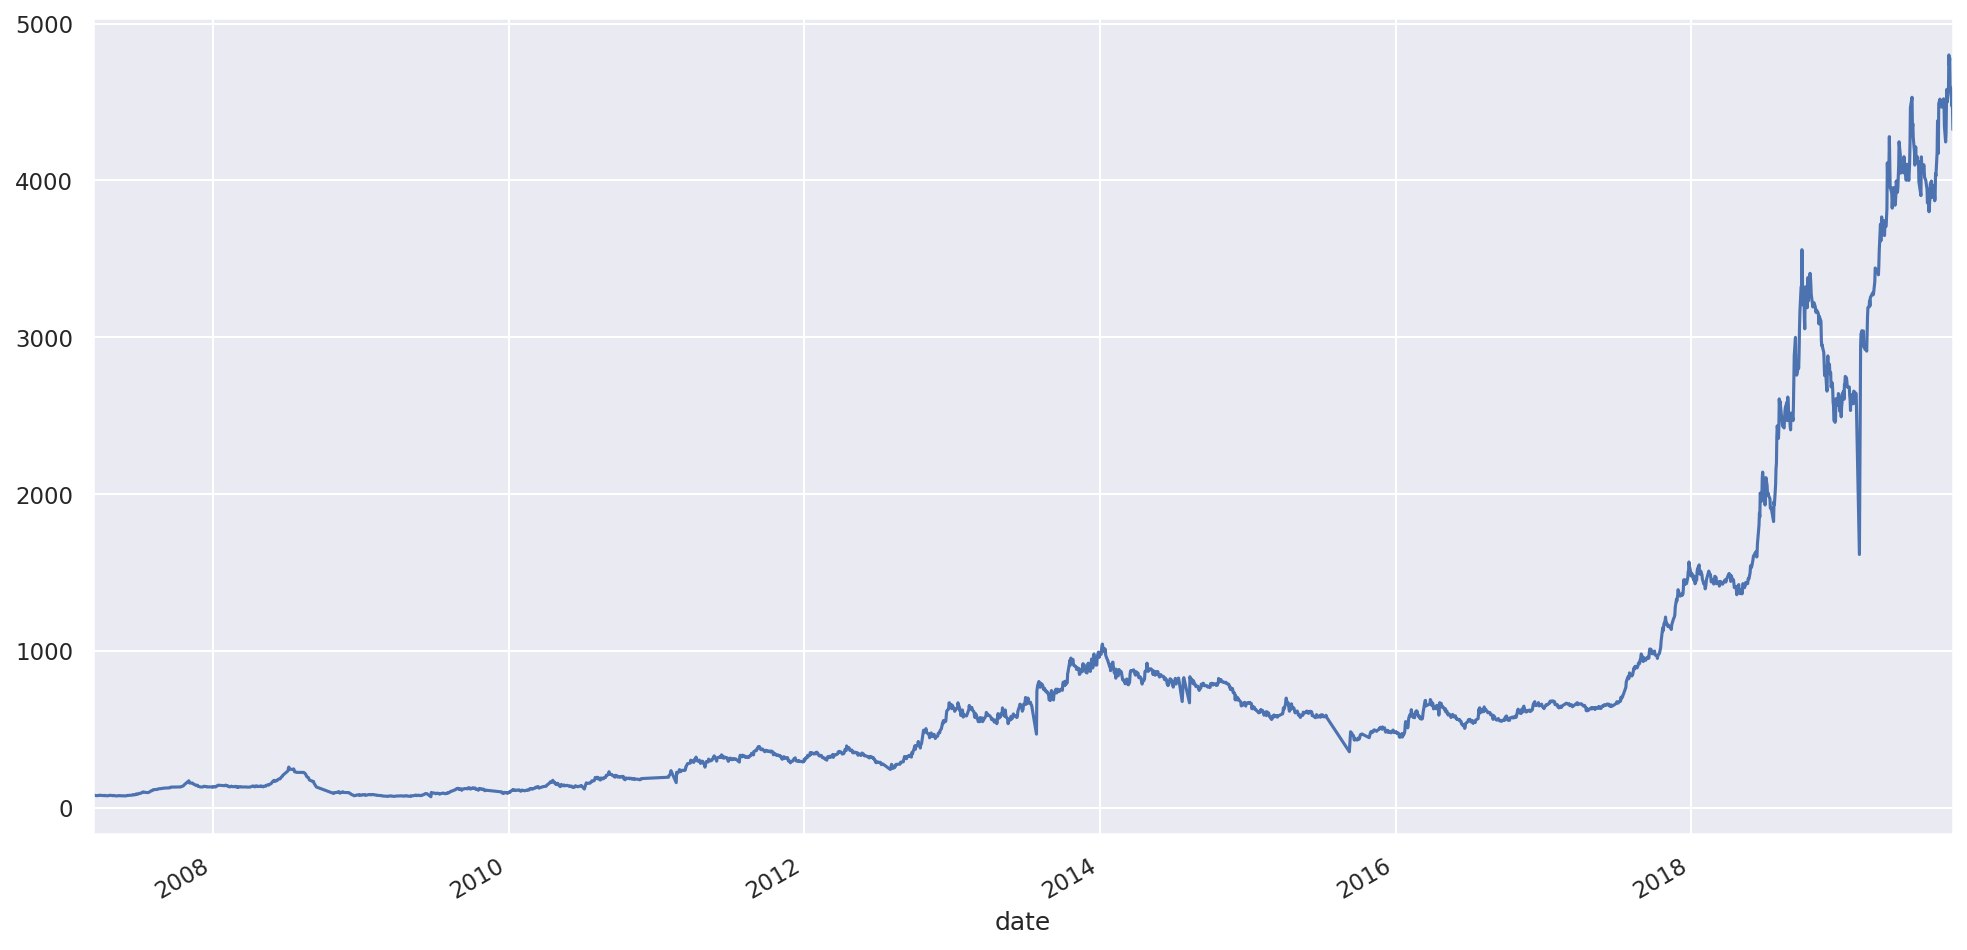

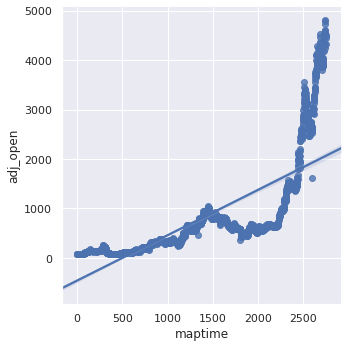

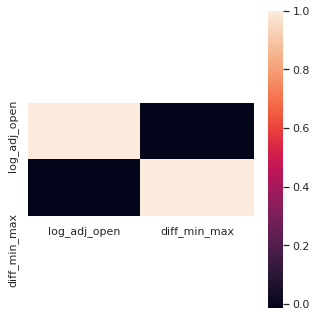

In [13]:
x = df["maptime"].values.reshape(-1,1)
y = df["adj_ending"].values
model = LinearRegression()
model.fit(x, y)
print(model.coef_)
print(model.intercept_)

plt.figure(figsize=(16,8),dpi=150)
df["adj_open"].plot()

df["reg"] = model.predict(df["maptime"].values.reshape(-1,1))

sns.set(rc={'figure.figsize':(16, 8)})
# df[["adj_open", "adj_close", "adj_ending", "reg"]].plot(figsize=(16, 12), subplots=True)
# df[["adj_open", "adj_close", "reg",]].plot(figsize=(16, 12))
sns.lmplot(x="maptime", y="adj_open", data=df)
sns.lmplot(x="maptime", y="log_adj_open", data=df)
print(df.columns)
cor = df[["log_adj_open", "diff_min_max"]].corr()
sns.heatmap(cor, square = True)

In [ ]:

def cluster(df, symbols):
    data = []
    for symbol in symbols:
        df_symbol = df.loc[df["name"] == symbol]
        linear_regression(df_symbol)
        data.append(())
    df_cluster = pd.DataFrame
    kmeans = KMeans(n_clusters=3).fit(df)
    centroids = kmeans.cluster_centers_

In [114]:
df_corr = test_corr(dm, TA_SYMBOLS)

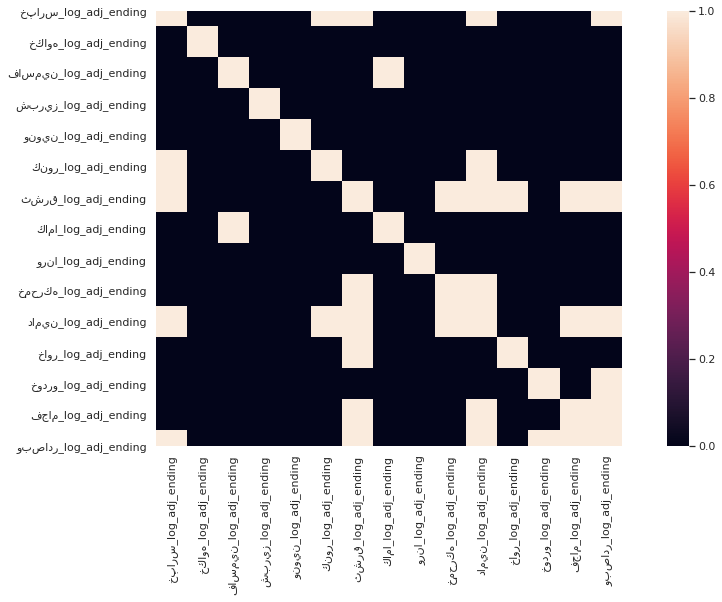

In [121]:
SELECT_THRESH = 0.9
df_thresh = df_corr.transform(lambda x: [1 if y >= SELECT_THRESH else 0 for y in x])
df_thresh
sns.heatmap(df_thresh, square = True)